In [32]:
import cv2
import numpy as np
import json
from PIL import Image

In [3]:
with open("../data/train.json", "r") as jfile:
    train_filenames = json.load(jfile)

In [4]:
train_filenames[0]

'3c6acfceb552_09'

In [74]:
train_uid = "3c6acfceb552"

In [75]:
imgs = np.zeros((16, 1280, 1918, 3), dtype=np.uint8)
for i in range(1, 17):
    fn = train_uid + "_{:02d}".format(i) + ".jpg"
    img = cv2.imread("../data/train/" + fn)
    if img is not None:
        imgs[i-1, ...] = img

In [76]:
imgs.shape

(16, 1280, 1918, 3)

In [77]:
median = np.median(imgs, axis=0)

In [78]:
median.dtype

dtype('float64')

In [79]:
diff = np.abs((imgs.astype(np.float32) - median))

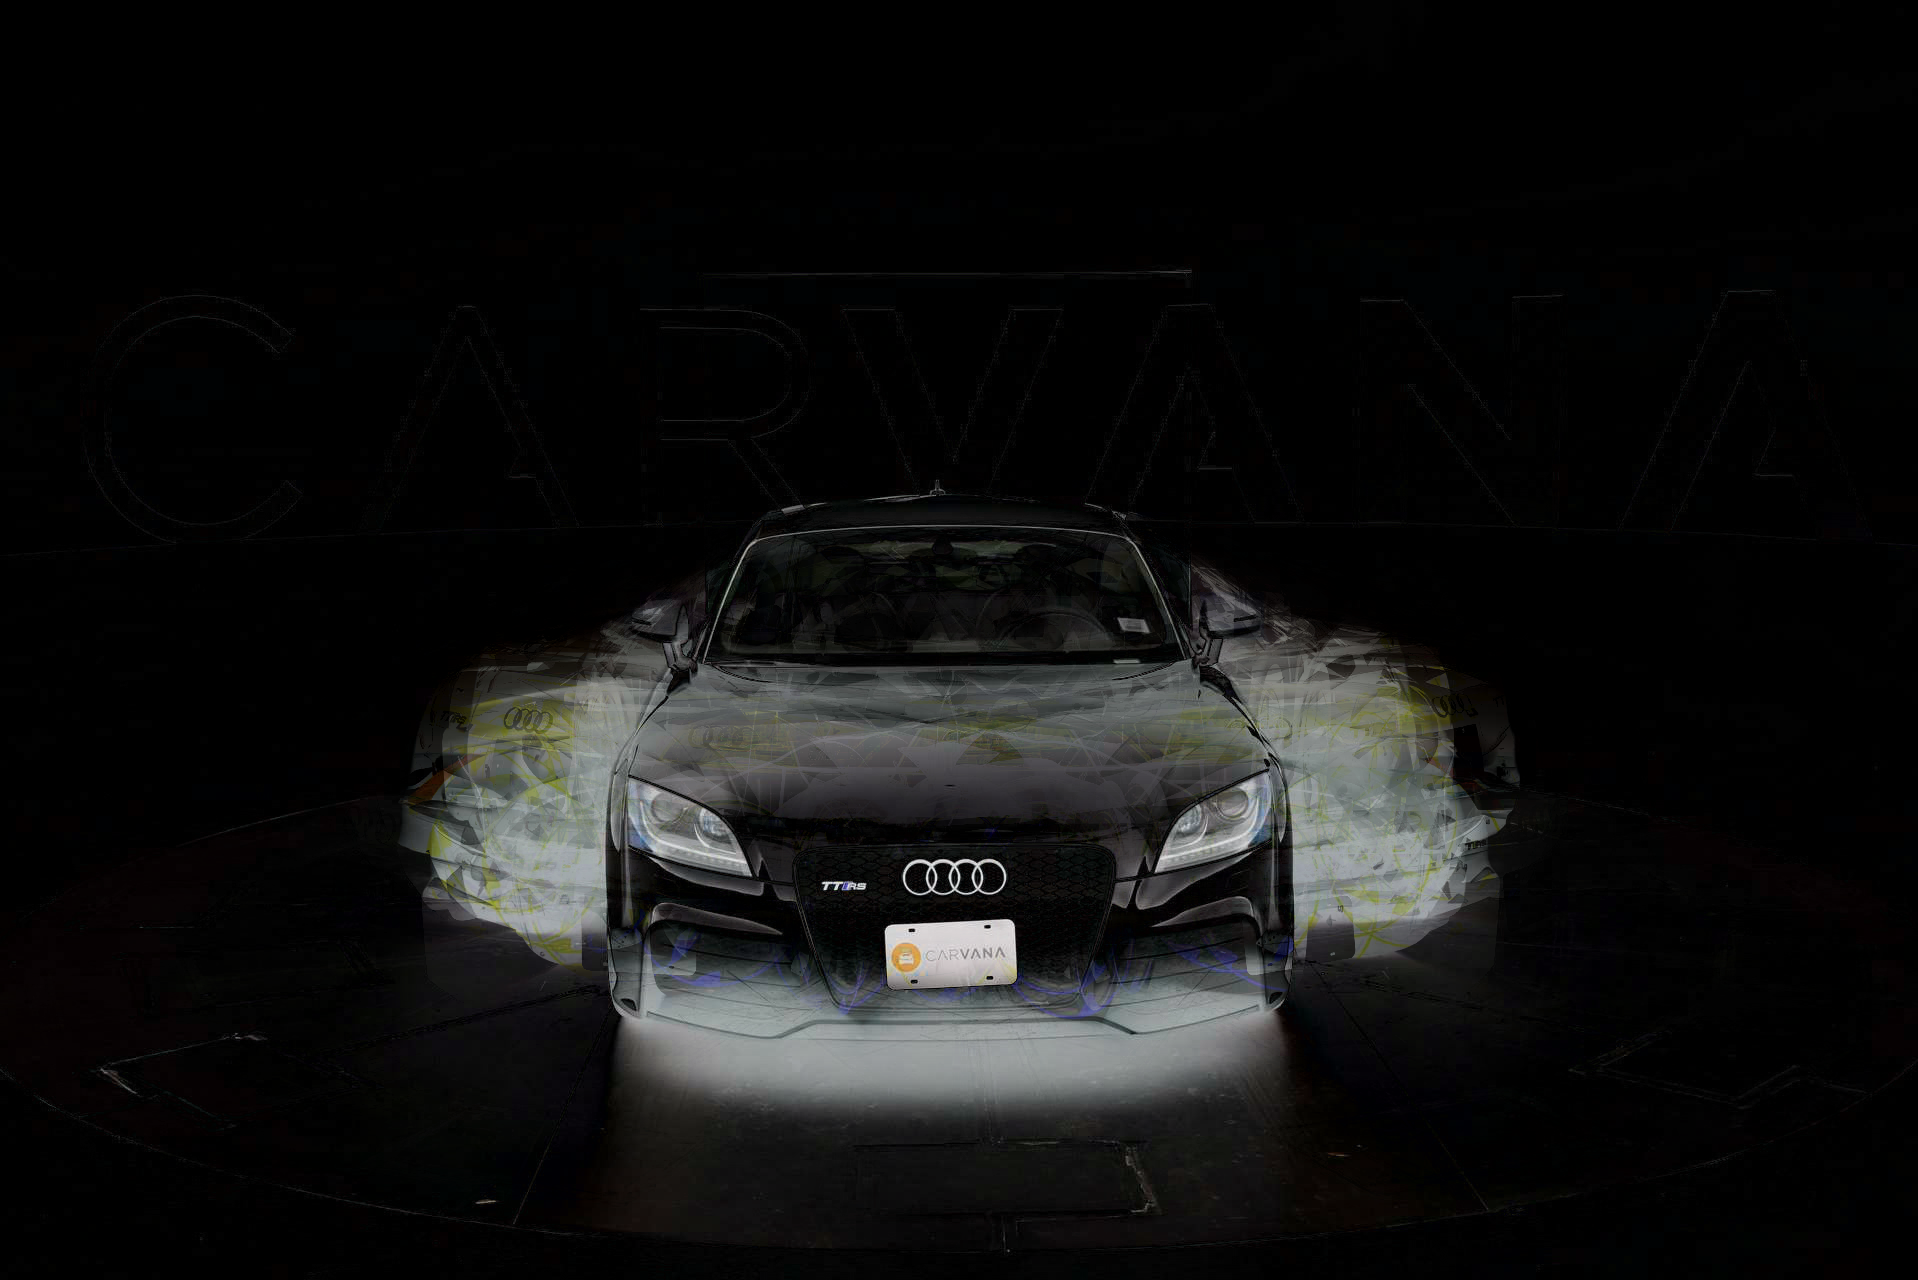

In [80]:
Image.fromarray(diff[0, ...].astype(np.uint8))

In [81]:
diff_rgb = np.sum(diff, axis=-1)

In [87]:
mask_predict = diff_rgb[13, ...] > 30

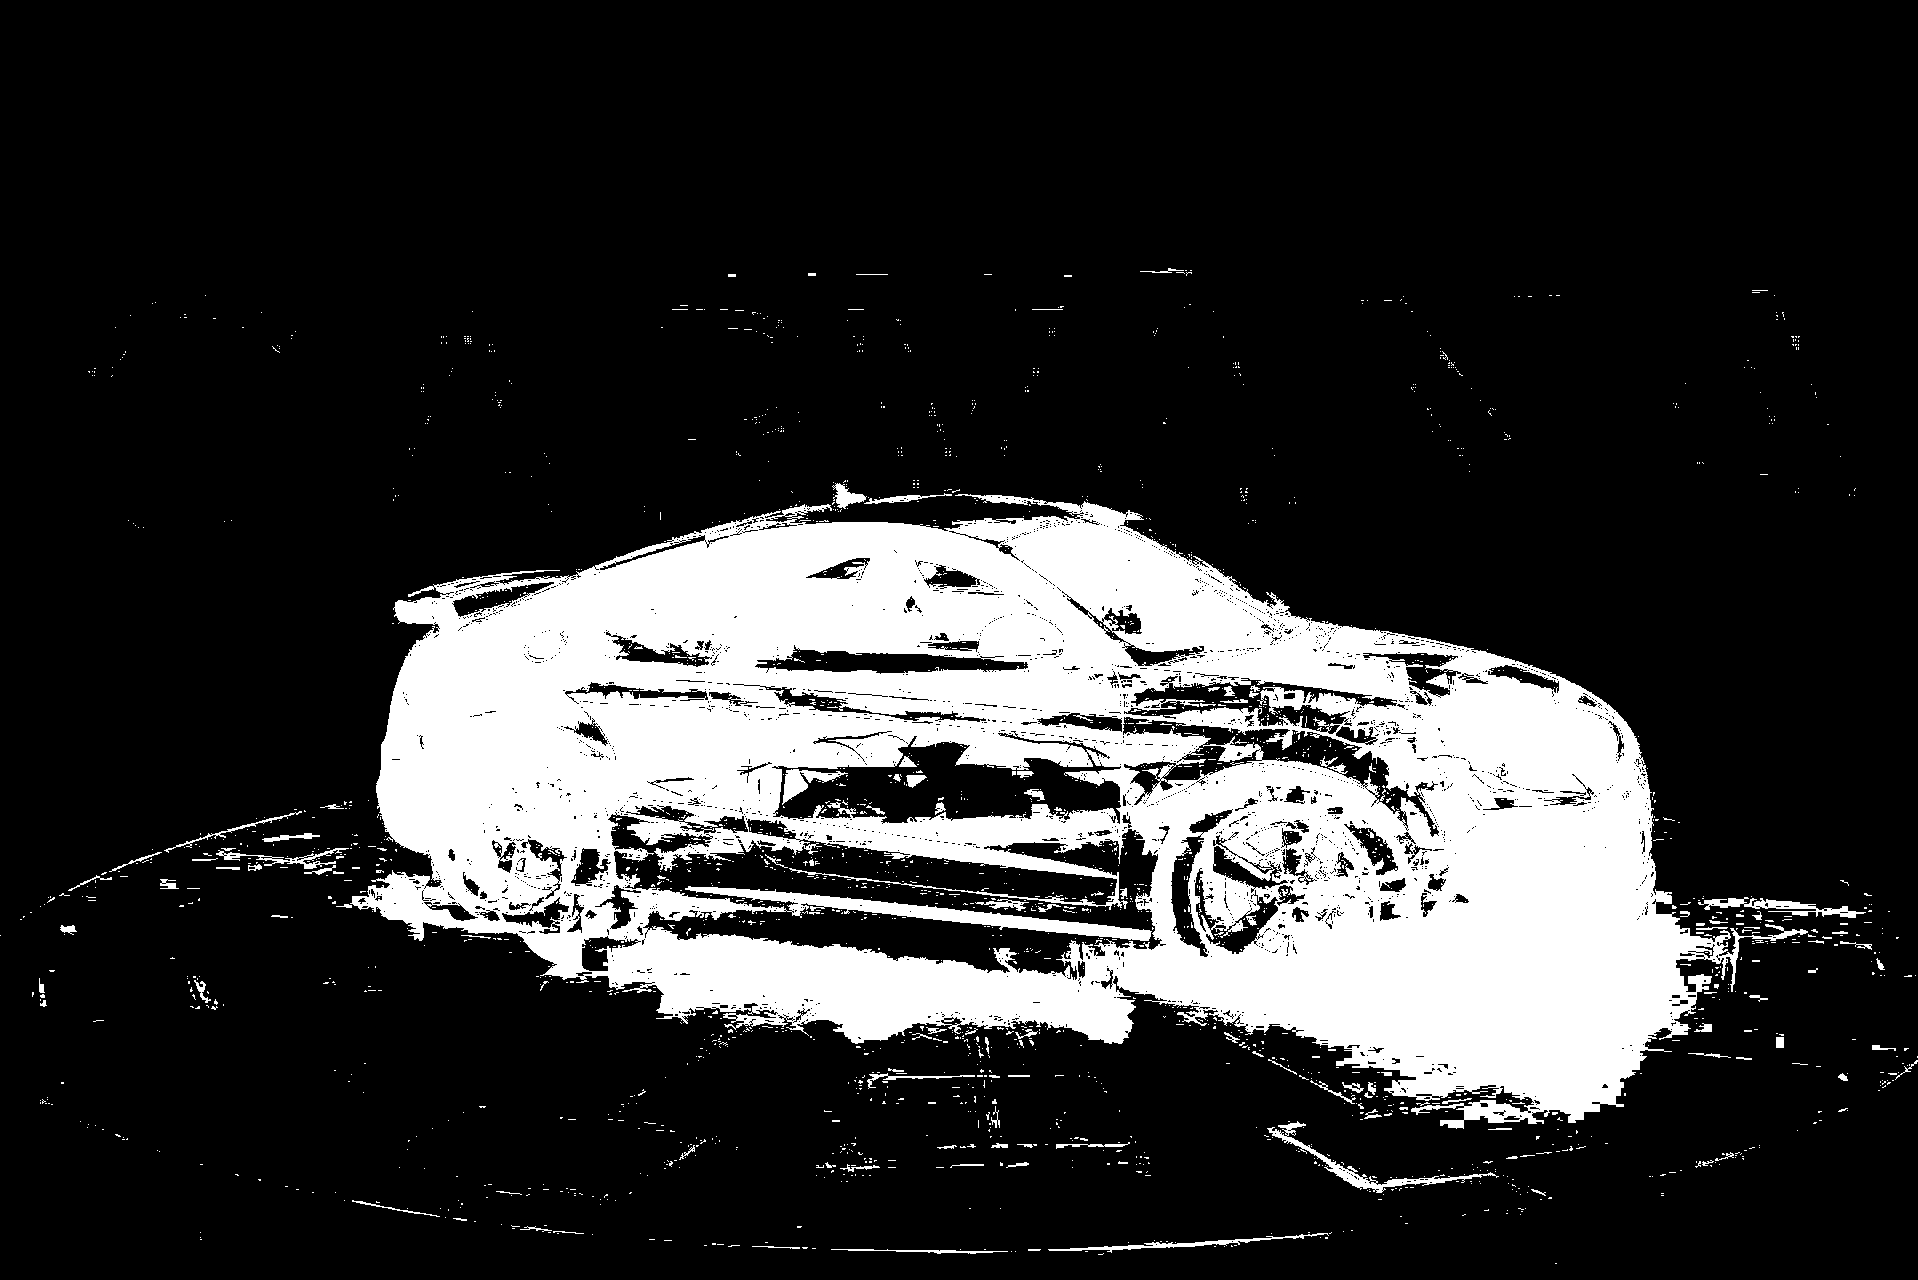

In [86]:
Image.fromarray(((diff_rgb[13, ...] > 30) * 255).astype(np.uint8))

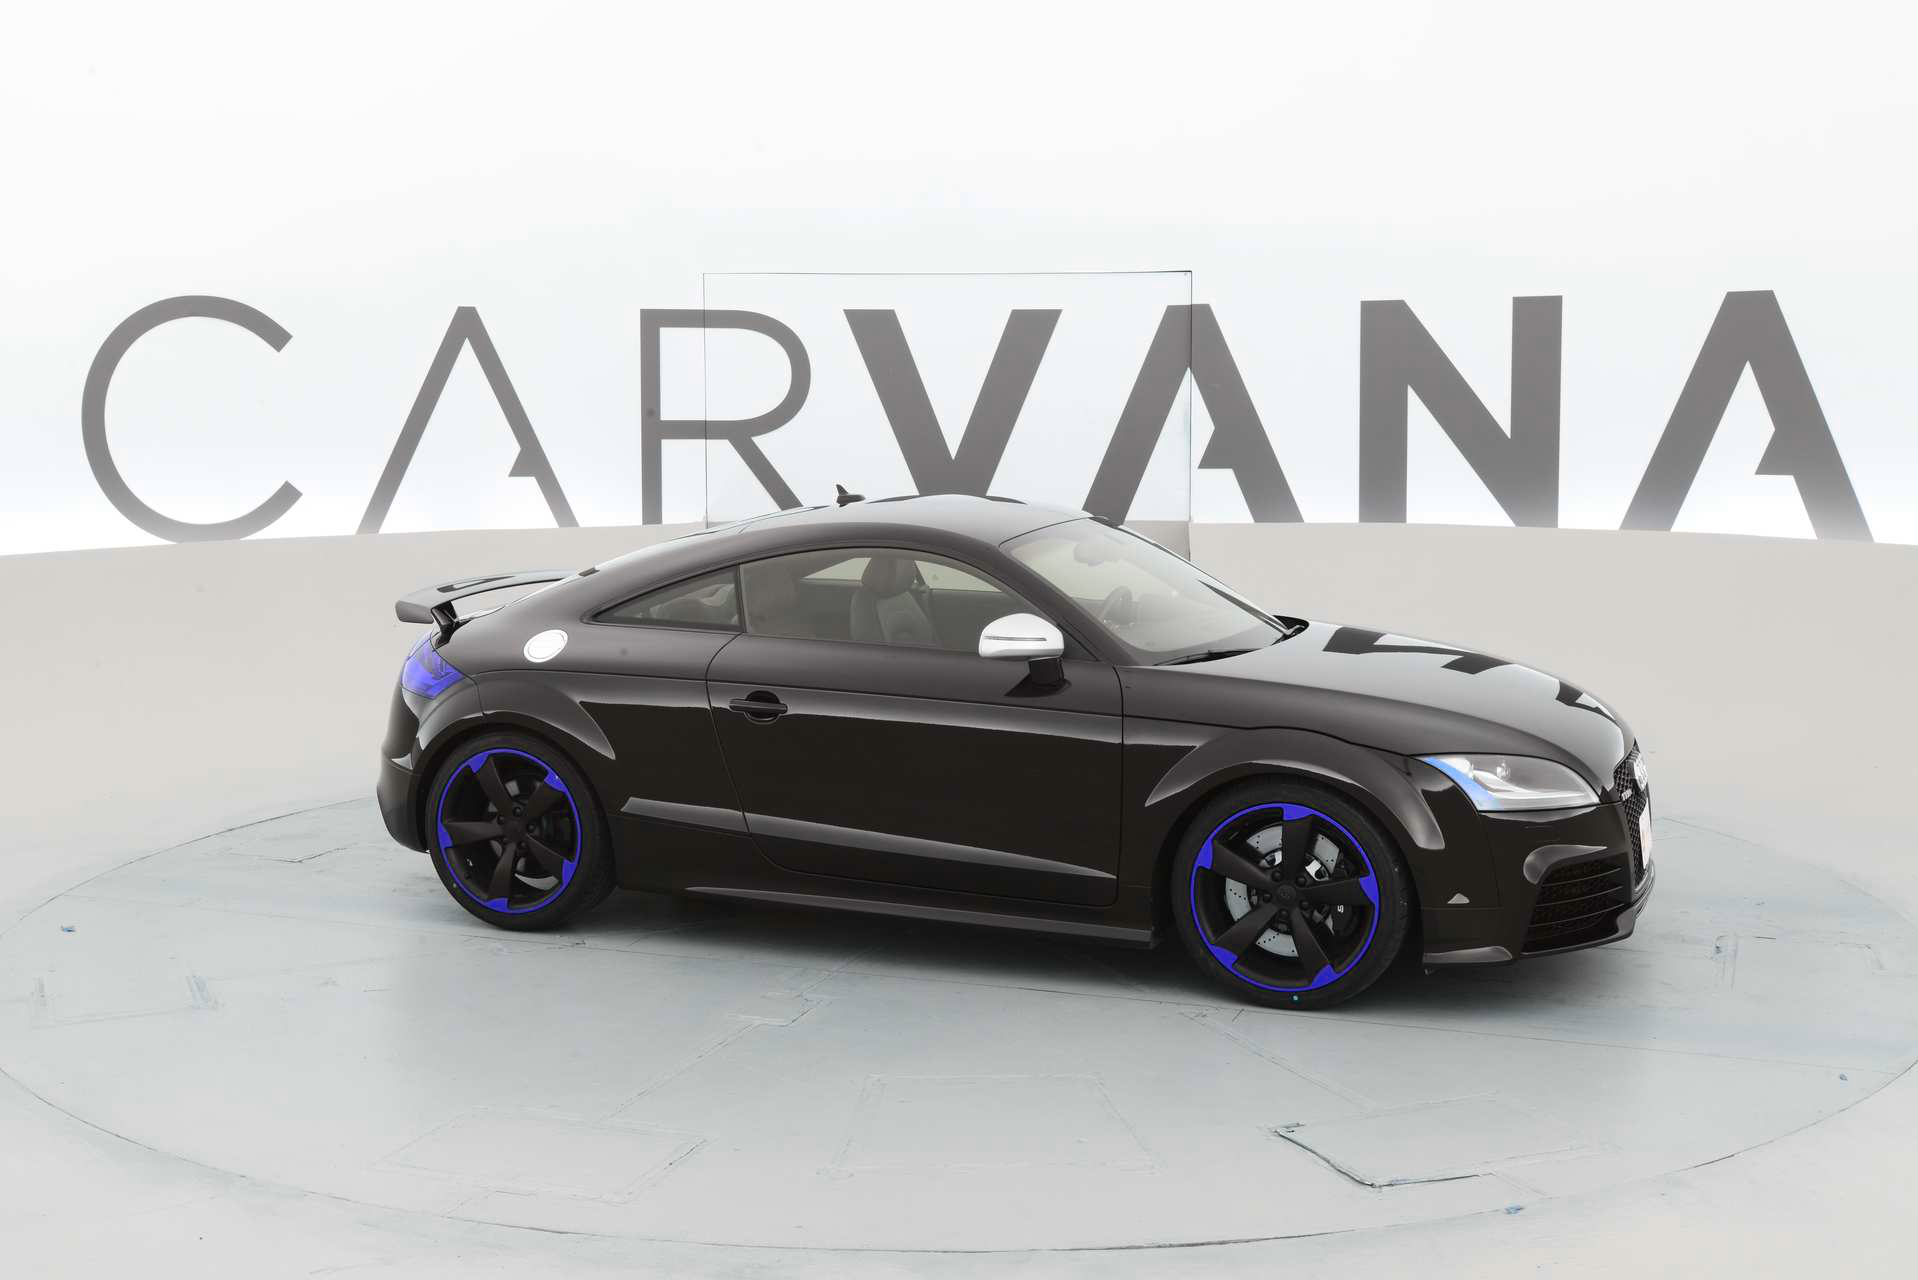

In [83]:
Image.fromarray(imgs[13, ...])